# 1. FUENTE DE INFORMACIÓN DE EVALUACIÓN

* [Skin Cancer MNIST: HAM10000](https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000)
* [SIIM-ISIC Melanoma Classification](https://www.kaggle.com/competitions/siim-isic-melanoma-classification/data?select=train.csv)
* [Skin Lesion Images for Melanoma Classification](https://www.kaggle.com/datasets/andrewmvd/isic-2019?select=ISIC_2019_Training_Input)

# 2. Formato de notebook de python (.ipynb)

### file.ipynb

# 3. Justificación
### La elección del conjunto de datos 'Skin Cancer MNIST: HAM10000' se basa en varios factores. En primer lugar, la creciente incidencia de cáncer de piel requiere una comprensión más profunda de sus patrones subyacentes. La preparación de mi esposa en dermatología agrega un enfoque clínico y perspicaz a este análisis. La combinación de habilidades en análisis de datos y el conocimiento médico promete una interpretación integral de los resultados, con el potencial de informar tanto la investigación médica como la atención al paciente. En última instancia, esta convergencia entre el ámbito de la salud y la exploración de información brinda una oportunidad emocionante para generar conocimientos valiosos en pro del avance médico y el bienestar de la sociedad.

#### Los casos incluyen una colección representativa de todas las categorías diagnósticas importantes en el ámbito de las lesiones pigmentadas: 
#### 1. Queratosis actínica y carcinoma intraepitelial/enfermedad de Bowen (akiec), 
#### 2. Carcinoma de células basales (bcc), 
#### 3. Lesiones similares a la queratosis benigna (lentigos solares/queratosis seborreica y liquen- plano como queratosis, bkl), 
#### 4. Dermatofibroma (df), 
#### 5. Melanoma (mel), 
#### 6. Nevos melanocíticos (nv)
#### 7. Lesiones vasculares (angiomas, angioqueratomas, granulomas piógenos y hemorragia, vasc).

# 4. Explicación del porqué de la elección del algoritmo

### Análisis de Datos e Implementación de Métodos de Clasificación

Métodos de clasificación para predecir la variable 'dx' (diagnóstico).

In [242]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [243]:
data = pd.read_csv('HAM10000_metadata.csv')
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


### Análisis Exploratorio de Datos

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [179]:
#data

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

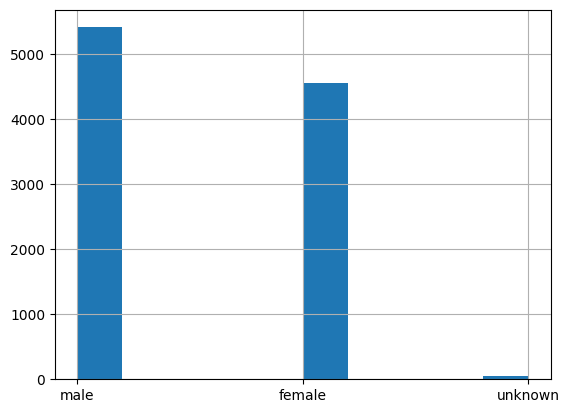

In [245]:
data['sex'].fillna('unknown').hist();
data["sex"].value_counts()

In [246]:
# Separando mis datos, en variables independeintes y variable dependiente

X = data.iloc[:, :-1].values
y = data.iloc[:, 6].values

In [175]:
# Pero cuantos niveles de estados tenemos? 

#data["sex"].value_counts()

In [174]:
#data["dx"].value_counts()

In [173]:
#data["dx_type"].value_counts()

In [172]:
#data["localization"].value_counts()

In [171]:
#data["age"].value_counts()

In [247]:
# Variables categóricas
le = LabelEncoder()
data['dx'] = le.fit_transform(data['dx'])
data['dx_type'] = le.fit_transform(data['dx_type'])
data['sex'] = le.fit_transform(data['sex'])
data['localization'] = le.fit_transform(data['localization'])
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,3,80.0,1,11
1,HAM_0000118,ISIC_0025030,2,3,80.0,1,11
2,HAM_0002730,ISIC_0026769,2,3,80.0,1,11
3,HAM_0002730,ISIC_0025661,2,3,80.0,1,11
4,HAM_0001466,ISIC_0031633,2,3,75.0,1,4


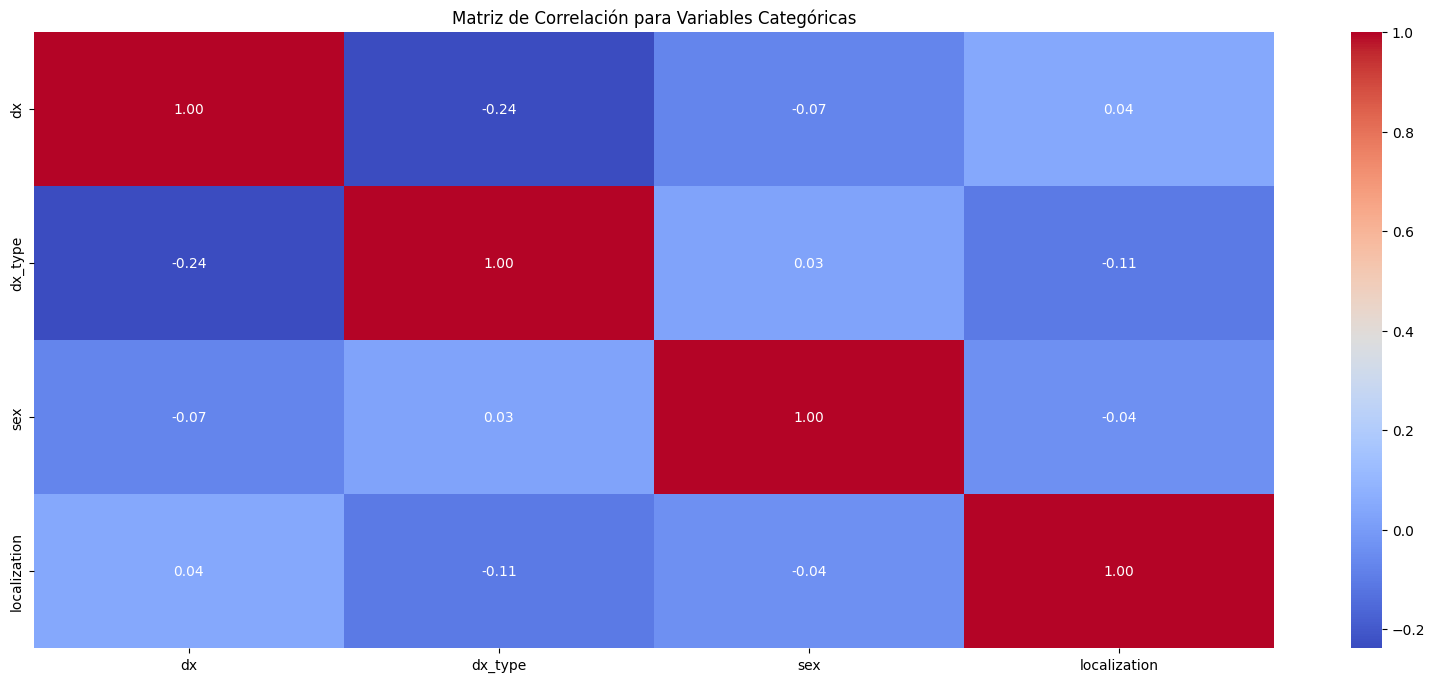

In [248]:

categorical_vars = ['dx', 'dx_type', 'sex', 'localization']
encoded_data = pd.get_dummies(data[categorical_vars])

# Calcular la matriz de correlación
correlation_matrix = encoded_data.corr()
# Generar el mapa de calor
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Variables Categóricas')
plt.show()

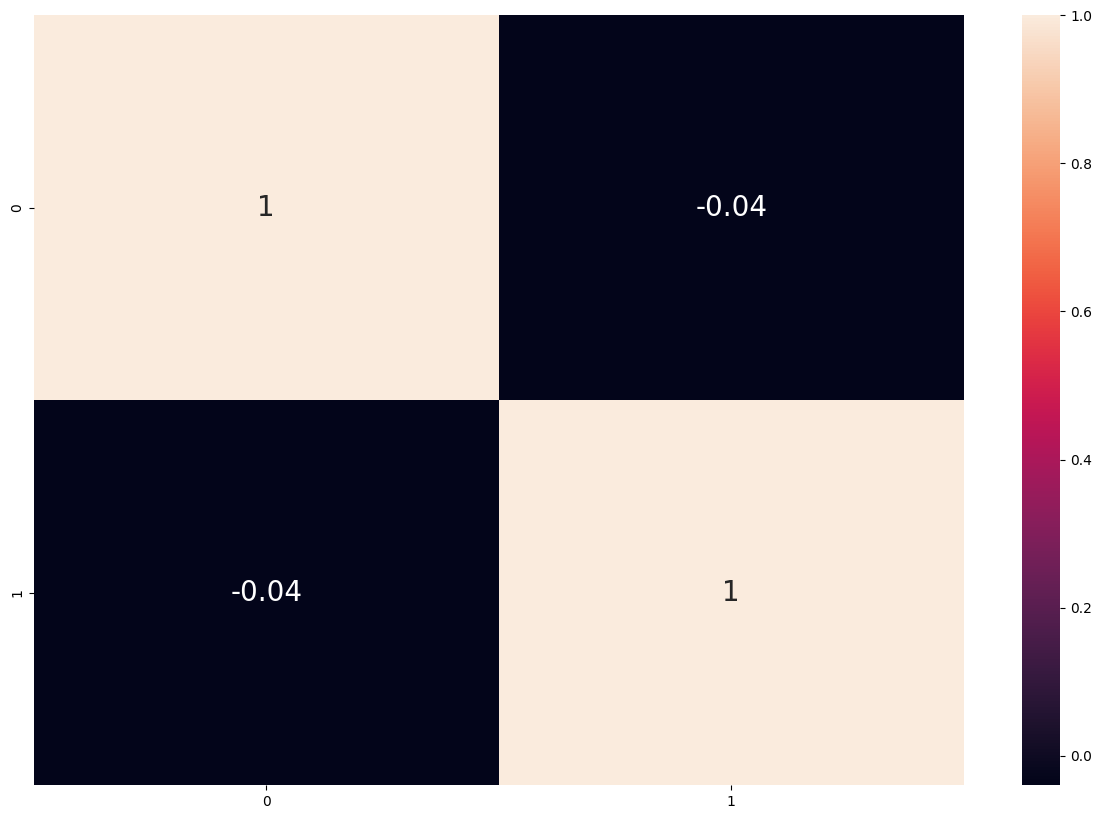

In [249]:
# podriamos ver cual es la relacion entre ambas variables....

plt.figure(figsize=(15, 10))
correlacion_sexo = np.corrcoef(data["sex"], data["localization"])
sns.heatmap(data=correlacion_sexo, annot=True, annot_kws={"size": 20})

plt.show()

### Distribución de las edades


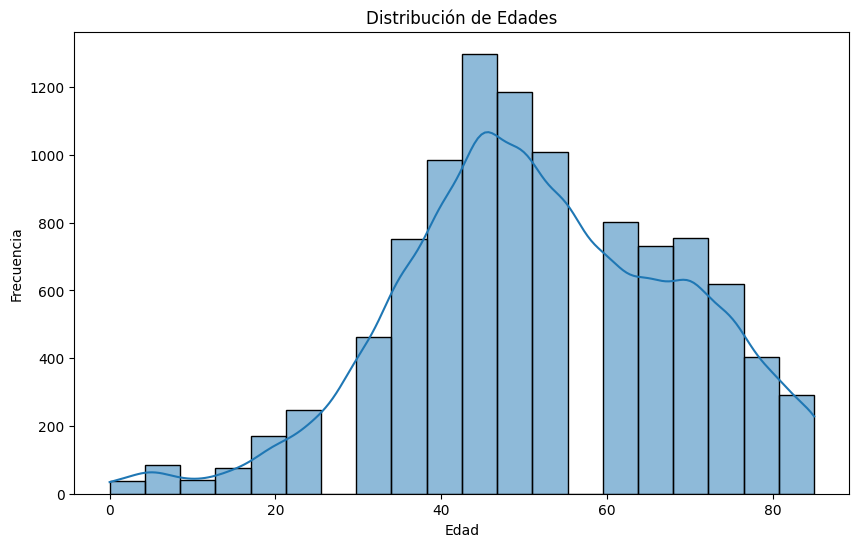

In [250]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Preprocesamiento de Datos

In [251]:
# Variables categóricas
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['localization'] = le.fit_transform(data['localization'])
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,3,80.0,1,11
1,HAM_0000118,ISIC_0025030,2,3,80.0,1,11
2,HAM_0002730,ISIC_0026769,2,3,80.0,1,11
3,HAM_0002730,ISIC_0025661,2,3,80.0,1,11
4,HAM_0001466,ISIC_0031633,2,3,75.0,1,4


### División de Datos

In [252]:
# NaN
missing_values_count = data.isna().sum()
print(missing_values_count)

total_missing_values = missing_values_count.sum()
print("Valores perdidos totales:", total_missing_values)

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64
Valores perdidos totales: 57


In [253]:
num_rows = data.shape[0]
print("Número total de filas:", num_rows)

Número total de filas: 10015


In [254]:
#Porcentaje que representa
percent_data = num_rows / (total_missing_values * 100)
print("El porcentaje de valores perdidos es:", round(percent_data, 2), "%")

El porcentaje de valores perdidos es: 1.76 %


# Modelo de clasificación

In [28]:
# Entrenamiento y prueba

# Enrenamiento eliminando datos perdidos
#data.dropna(inplace=True)
#X = data[['age', 'sex', 'localization']]
#y = data['dx']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Entrenamiento HistGradientBoostingClassifier

Se utiliza como alternativa para el manejo natural de valores faltantes. Es útil ahora porque los valores faltantes no se desean imputar.

In [62]:
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingClassifier

X = data[['age', 'sex', 'localization']]
y = data['dx']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [48]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

In [51]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
round(accuracy,4)

0.7034

In [53]:
data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,1,11
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,1,11
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,1,11
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,1,11
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,1,4
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,1,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,1,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,1,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,1,5


# Clustering

In [68]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/home/fabianbanderas/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


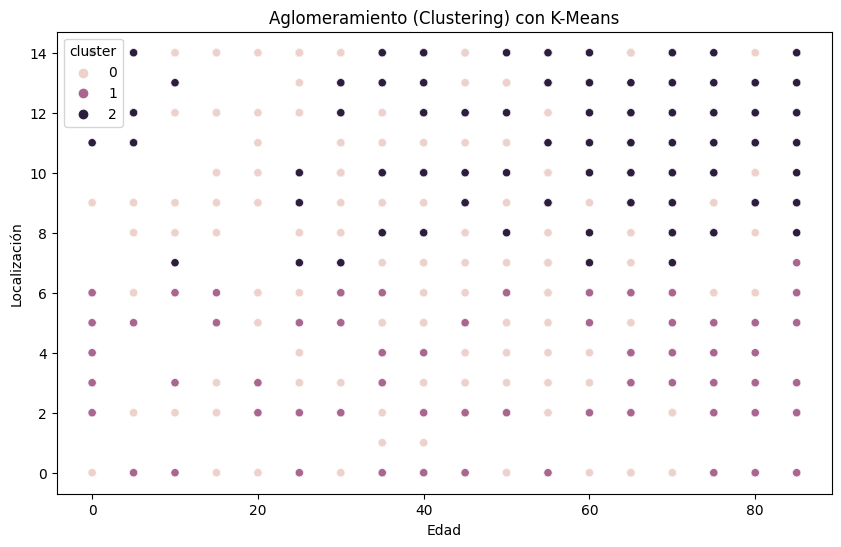

In [61]:


# Escalar las características
scaler = StandardScaler()
X_clustering = scaler.fit_transform(data[['age', 'sex', 'localization']])
data.dropna(inplace=True)
# Cargar los datos
#data = pd.read_csv('HAM10000_metadata.csv')

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_clustering)

# Visualizar los resultados del Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='localization', hue='cluster', data=data)
plt.title('Aglomeramiento (Clustering) con K-Means')
plt.xlabel('Edad')
plt.ylabel('Localización')
plt.show()

# Deep Learning

In [77]:
# Codificar las etiquetas para clasificación binaria
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [71]:
# Construir un modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))


Epoch 1/10
247/249 [============================>.] - ETA: 0s - loss: -3481.3730 - accuracy: 0.0526WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fdefc598040> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7fdefc598040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7fdefc598040>. Note that functions defined in certain environments, like the interactive P

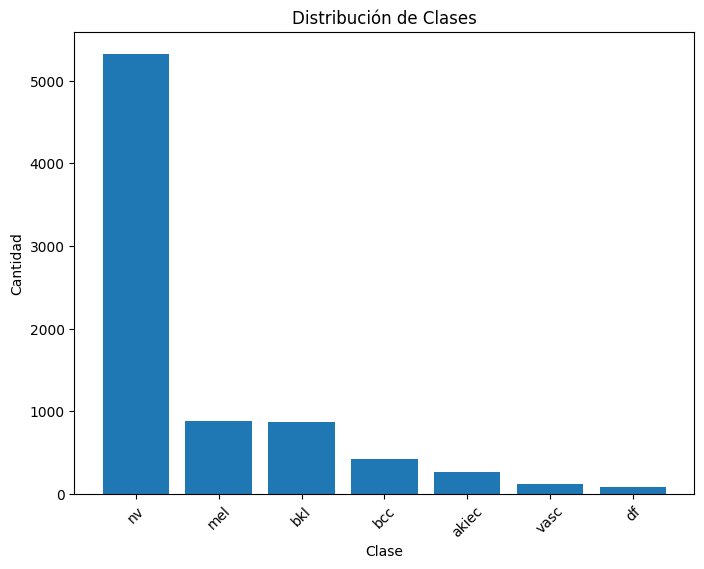

In [72]:
import matplotlib.pyplot as plt

# Visualizar la distribución de clases
plt.figure(figsize=(8, 6))
class_counts = y_train.value_counts()
class_names = class_counts.index
plt.bar(class_names, class_counts)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

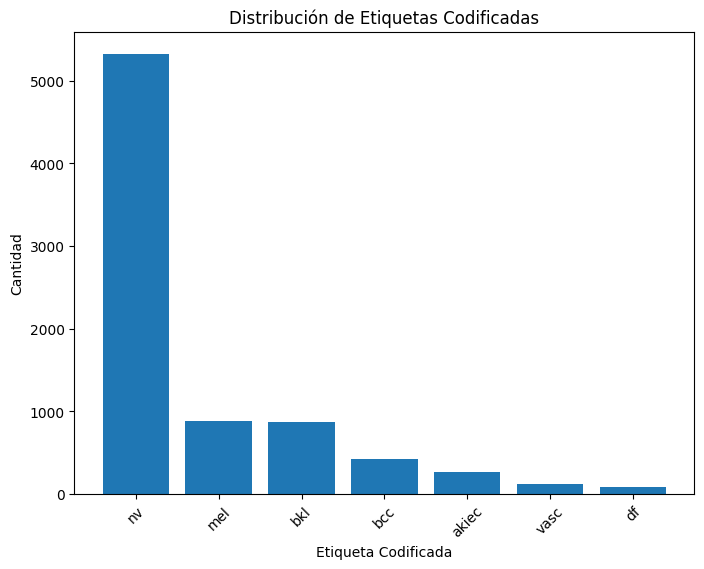

In [73]:
# Visualizar las etiquetas codificadas
plt.figure(figsize=(8, 6))
encoded_class_counts = pd.Series(y_train_encoded).value_counts()
encoded_class_names = le.inverse_transform(encoded_class_counts.index)
plt.bar(encoded_class_names, encoded_class_counts)
plt.title('Distribución de Etiquetas Codificadas')
plt.xlabel('Etiqueta Codificada')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


Sobremuestreo de Clases Minoritarias con SMOTE:

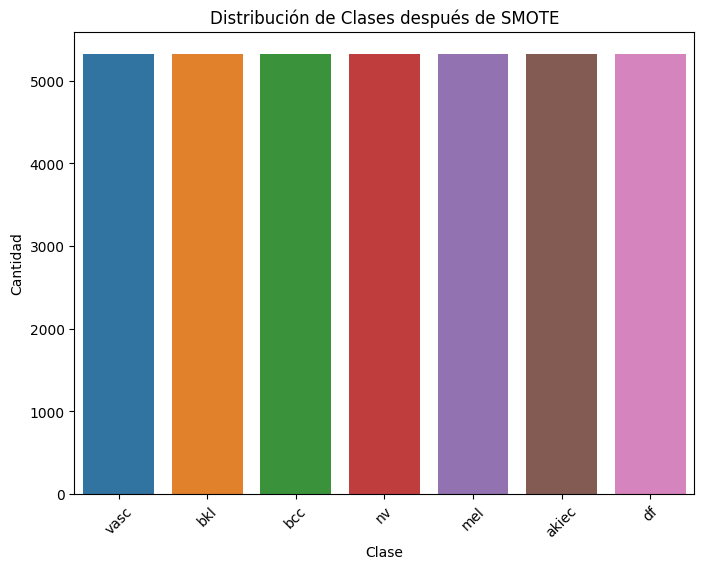

In [84]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar SMOTE para sobremuestrear clases minoritarias
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualizar la distribución de clases después de SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Distribución de Clases después de SMOTE')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Entrenar el modelo en los datos resampleados
#model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Submuestreo de Clases Mayoritarias y Visualización

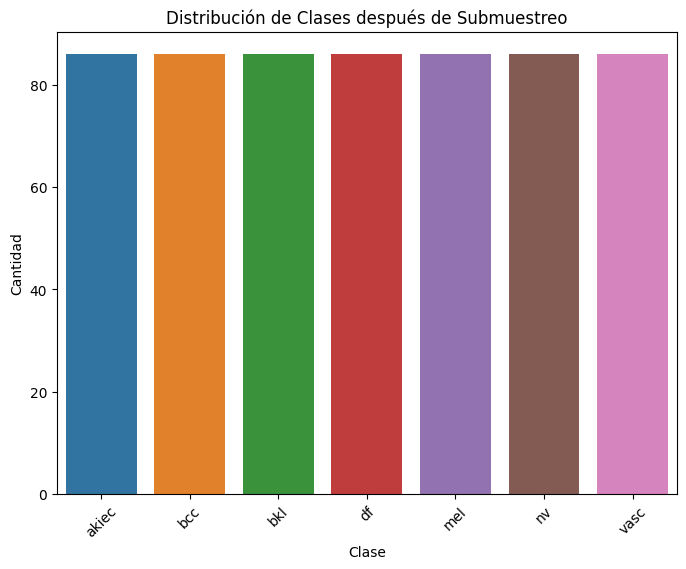

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar submuestreo aleatorio a clases mayoritarias
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print("mel: Melanoma")
print("bkl: Carcinoma basocelular")
print("")


# Visualizar la distribución de clases después de submuestreo
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Distribución de Clases después de Submuestreo')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Entrenar el modelo en los datos resampleados
#model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))


External data

In [256]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
from skimage import io
from tqdm import tqdm
import seaborn as sns

In [257]:
!mkdir '512x512-dataset-melanoma'
!mkdir '512x512-test'

mkdir: cannot create directory ‘512x512-dataset-melanoma’: File exists
mkdir: cannot create directory ‘512x512-test’: File exists


In [258]:
# Ruta completa al archivo train.csv
csv_file_path = '/home/fabianbanderas/Documents/5_BIMESTRE/CEIoT_ApA Jorge Lara Ceballos/SKIN_CANCER/train.csv'


# Leer el archivo CSV en un DataFrame
df_train = pd.read_csv(csv_file_path)


isic 2019

In [255]:
csv_file_path = '/home/fabianbanderas/Documents/5_BIMESTRE/CEIoT_ApA Jorge Lara Ceballos/SKIN_CANCER/ISIC_2019_Training_GroundTruth.csv'
df_gt = pd.read_csv(csv_file_path)
image_id = df_gt.iloc[25]['image']
image = cv2.imread(f'../input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/{image_id}.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
io.imshow(image)


[ WARN:0@63263.524] global loadsave.cpp:244 findDecoder imread_('../input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000026_downsampled.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Skin Cancer MNIST: HAM10000 [Repeated]

In [214]:
df_meta = pd.read_csv('HAM10000_metadata.csv')

In [224]:
import cv2

from skimage import io
#from skimage.io import imread  # Importar solo la función imread desde skimage.io



In [227]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
from skimage import io
from tqdm import tqdm
import seaborn as sns

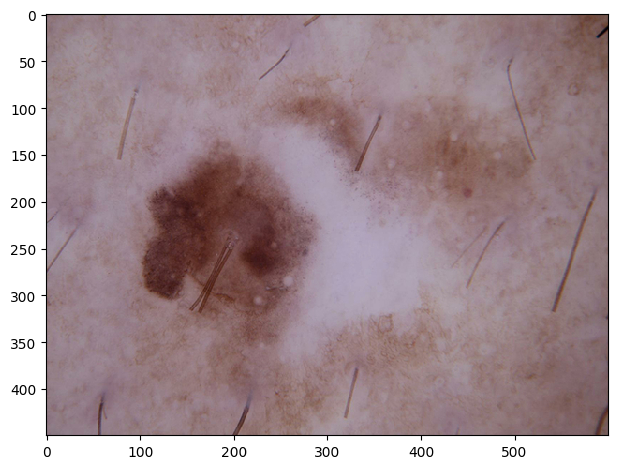

In [239]:
"""
image_id = df_meta.iloc[777]['image_id']

image = cv2.imread(f'../home/fabianbanderas/Documents/5_BIMESTRE/CEIoT_ApA Jorge Lara Ceballos/SKIN_CANCER/HAM10000_images_part_1/{image_id}.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
io.imshow(image);
"""
import cv2
from skimage import io
import os

# Ruta del directorio de imágenes
image_dir = '/home/fabianbanderas/Documents/5_BIMESTRE/CEIoT_ApA Jorge Lara Ceballos/SKIN_CANCER/HAM10000_images_part_1'

# Obtener el ID de la imagen
image_id = df_meta.iloc[757]['image_id']

# Construir la ruta completa de la imagen
image_path = os.path.join(image_dir, f'{image_id}.jpg')

# Cargar la imagen
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Verificar si la imagen se cargó correctamente
if image is None:
    print(f"Error loading image '{image_path}'")
else:
    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Mostrar la imagen
    io.imshow(image)


# 5. Deberá expresar de manera clara el resultado de la investigación aportando las métricas necesarias para comprender cómo se desempeña el algoritmo elegido.

# 6. En su cierre debe dar una reflexión de su investigación y proponer nuevos caminos de resolución en el caso que sea necesario.